# Filtering and trimming messages

In [30]:
%%capture --no-stderr
%pip install --quiet -U langchain_core langgraph langchain_openai

In [31]:
import os, getpass

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

_set_env("OPENAI_API_KEY")

In [32]:
_set_env("LANGSMITH_API_KEY")
os.environ["LANGSMITH_TRACING"] = "true"
os.environ["LANGSMITH_PROJECT"] = "langchain-academy"

In [33]:
from pprint import pprint
from langchain_core.messages import AIMessage, HumanMessage
messages = [AIMessage(f"So you said you wanted to know interesting facts about cosmos?", name="Bot")]
messages.append(HumanMessage(f"Yes, I know about black holes. But what other celestial bodies should I learn about?", name="arnav"))

for m in messages:
    m.pretty_print()

================================== Ai Message ==================================
Name: Bot

So you said you wanted to know interesting facts about cosmos?
================================ Human Message =================================
Name: arnav

Yes, I know about black holes. But what other celestial bodies should I learn about?


In [34]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model="gpt-4o")
llm.invoke(messages)

AIMessage(content='There are many fascinating celestial bodies and phenomena in the universe to explore beyond black holes. Here are some you might find intriguing:\n\n1. **Neutron Stars**: These are incredibly dense remnants of massive stars that have exploded in supernovae. A sugar-cube-sized amount of neutron-star material would weigh about a billion tons on Earth. Neutron stars can also become pulsars, emitting beams of radiation from their poles.\n\n2. **Quasars**: These are extremely luminous objects powered by supermassive black holes at the centers of distant galaxies. Quasars are among the brightest objects in the universe and can outshine entire galaxies.\n\n3. **Exoplanets**: Planets that orbit stars outside our solar system. Thousands have been discovered, and some are located in the "habitable zone" where conditions might support liquid water—and potentially life.\n\n4. **Brown Dwarfs**: Sometimes called "failed stars," these objects are too massive to be planets but not m

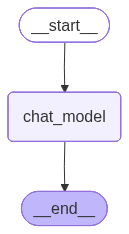

In [35]:
from IPython.display import Image, display
from langgraph.graph import MessagesState
from langgraph.graph import StateGraph, START, END

# Node
def chat_model_node(state: MessagesState):
    return {"messages": llm.invoke(state["messages"])}

# Build graph
builder = StateGraph(MessagesState)
builder.add_node("chat_model", chat_model_node)
builder.add_edge(START, "chat_model")
builder.add_edge("chat_model", END)
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [36]:
output = graph.invoke({'messages': messages})
for m in output['messages']:
    m.pretty_print()

================================== Ai Message ==================================
Name: Bot

So you said you wanted to know interesting facts about cosmos?
================================ Human Message =================================
Name: arnav

Yes, I know about black holes. But what other celestial bodies should I learn about?
================================== Ai Message ==================================

Apart from black holes, there are many fascinating celestial bodies and phenomena in the universe worth exploring. Here are a few you might find interesting:

1. **Neutron Stars**: These are incredibly dense remnants of massive stars that have exploded in supernovae. A neutron star can pack more mass than the Sun into a city-sized sphere, making them one of the densest types of objects in the universe.

2. **Pulsars**: A type of neutron star that emits beams of radiation from its magnetic poles. As they rotate, these beams sweep across space, and if one of them crosses Earth, i

## Reducer

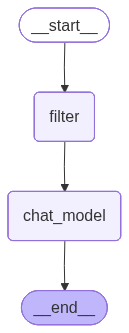

In [37]:
from langchain_core.messages import RemoveMessage

# Nodes
def filter_messages(state: MessagesState):
    # Delete all but the 2 most recent messages
    delete_messages = [RemoveMessage(id=m.id) for m in state["messages"][:-2]]
    return {"messages": delete_messages}

def chat_model_node(state: MessagesState):    
    return {"messages": [llm.invoke(state["messages"])]}

# Build graph
builder = StateGraph(MessagesState)
builder.add_node("filter", filter_messages)
builder.add_node("chat_model", chat_model_node)
builder.add_edge(START, "filter")
builder.add_edge("filter", "chat_model")
builder.add_edge("chat_model", END)
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [38]:
# Message list with a preamble
messages = [AIMessage("Hi.", name="Bot", id="1")]
messages.append(HumanMessage("Hi.", name="arnav", id="2"))
messages.append(AIMessage("So you said you wanted to know interesting facts about cosmos??", name="Bot", id="3"))
messages.append(HumanMessage("Yes, I know about black holes. But what other celestial bodies should I learn about?", name="arnav", id="4"))

# Invoke
output = graph.invoke({'messages': messages})
for m in output['messages']:
    m.pretty_print()

================================== Ai Message ==================================
Name: Bot

So you said you wanted to know interesting facts about cosmos??
================================ Human Message =================================
Name: arnav

Yes, I know about black holes. But what other celestial bodies should I learn about?
================================== Ai Message ==================================

There’s a vast array of fascinating celestial bodies to explore beyond black holes. Here are a few you might find interesting:

1. **Neutron Stars**: These are the remnants of massive stars that have exploded in supernovae. They're incredibly dense, with the mass of about 1.4 times that of the sun packed into a sphere with a radius of only about 10 kilometers.

2. **Pulsars**: A type of neutron star that emits beams of radiation from its magnetic poles. As the star rotates, these beams sweep across the sky, appearing to pulse, which is how they got their name.

3. **Quasars**:

## Filtering messages



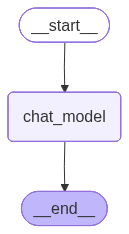

In [39]:
# Node
def chat_model_node(state: MessagesState):
    return {"messages": [llm.invoke(state["messages"][-1:])]}

# Build graph
builder = StateGraph(MessagesState)
builder.add_node("chat_model", chat_model_node)
builder.add_edge(START, "chat_model")
builder.add_edge("chat_model", END)
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [40]:
messages.append(output['messages'][-1])
messages.append(HumanMessage(f"Tell me more about the origin of universe and big bang!", name="arnav"))

In [41]:
for m in messages:
    m.pretty_print()

================================== Ai Message ==================================
Name: Bot

Hi.
================================ Human Message =================================
Name: arnav

Hi.
================================== Ai Message ==================================
Name: Bot

So you said you wanted to know interesting facts about cosmos??
================================ Human Message =================================
Name: arnav

Yes, I know about black holes. But what other celestial bodies should I learn about?
================================== Ai Message ==================================

There’s a vast array of fascinating celestial bodies to explore beyond black holes. Here are a few you might find interesting:

1. **Neutron Stars**: These are the remnants of massive stars that have exploded in supernovae. They're incredibly dense, with the mass of about 1.4 times that of the sun packed into a sphere with a radius of only about 10 kilometers.

2. **Pulsars**: A type of

In [42]:
# Invoke, using message filtering
output = graph.invoke({'messages': messages})
for m in output['messages']:
    m.pretty_print()

================================== Ai Message ==================================
Name: Bot

Hi.
================================ Human Message =================================
Name: arnav

Hi.
================================== Ai Message ==================================
Name: Bot

So you said you wanted to know interesting facts about cosmos??
================================ Human Message =================================
Name: arnav

Yes, I know about black holes. But what other celestial bodies should I learn about?
================================== Ai Message ==================================

There’s a vast array of fascinating celestial bodies to explore beyond black holes. Here are a few you might find interesting:

1. **Neutron Stars**: These are the remnants of massive stars that have exploded in supernovae. They're incredibly dense, with the mass of about 1.4 times that of the sun packed into a sphere with a radius of only about 10 kilometers.

2. **Pulsars**: A type of

## Trim messages

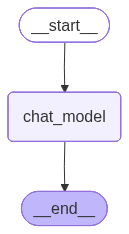

In [43]:
from langchain_core.messages import trim_messages

# Node
def chat_model_node(state: MessagesState):
    messages = trim_messages(
            state["messages"],
            max_tokens=100,
            strategy="last",
            token_counter=ChatOpenAI(model="gpt-4o"),
            allow_partial=False,
        )
    return {"messages": [llm.invoke(messages)]}

# Build graph
builder = StateGraph(MessagesState)
builder.add_node("chat_model", chat_model_node)
builder.add_edge(START, "chat_model")
builder.add_edge("chat_model", END)
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [44]:
messages.append(output['messages'][-1])
messages.append(HumanMessage(f"Tell me about neutron stars", name="arnav"))

In [45]:
# Example of trimming messages
trim_messages(
            messages,
            max_tokens=100,
            strategy="last",
            token_counter=ChatOpenAI(model="gpt-4o"),
            allow_partial=False
        )

[HumanMessage(content='Tell me about neutron stars', additional_kwargs={}, response_metadata={}, name='arnav')]

In [46]:
# Invoke, using message trimming in the chat_model_node 
messages_out_trim = graph.invoke({'messages': messages})